# TITLE : Fake News Detection & Misinformation Tracker

### 1. DATA GATHERING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [4]:
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

print("True news shape:", true_news.shape)
print("Fake news shape:", fake_news.shape)

True news shape: (21417, 4)
Fake news shape: (23481, 4)


In [7]:
true_news['label'] = 1
fake_news['label'] = 0

# Concatenating both datasets
df = pd.concat([true_news, fake_news], ignore_index=True)
# Shuffling the dataset for randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (44898, 5)


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 2. EXPLORATORY DATA ANALYSIS

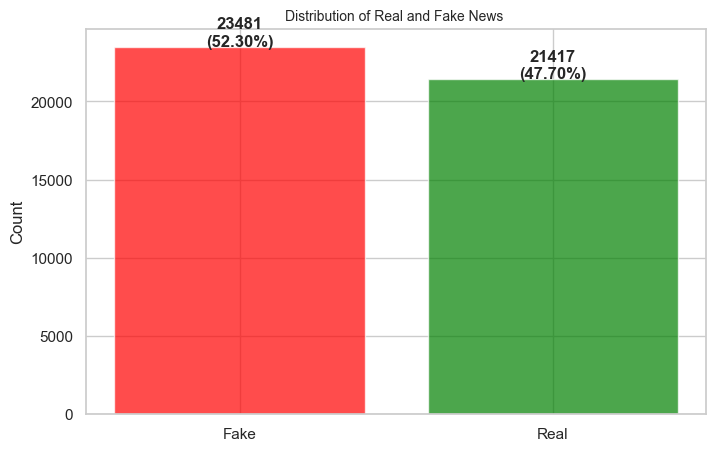

In [16]:
counts = df['label'].value_counts()
labels = ['Fake','Real']
colors = ['red', 'green']
# Creating bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(labels, counts, color=colors, alpha=0.7)
# Adding counts and percentages on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percentage = count / df.shape[0] * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{count}\n({percentage:.2f}%)',ha='center', fontsize=12, fontweight='bold')
plt.title("Distribution of Real and Fake News ", fontsize=10)
plt.ylabel("Count", fontsize=12)
plt.show()

In [18]:
# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 209


In [20]:
df = df.drop_duplicates().reset_index(drop=True)
print(f"New dataset shape after removing duplicates: {df.shape}")

New dataset shape after removing duplicates: (44689, 5)


C:\Users\rames\AppData\Local\Temp\ipykernel_20692\241071318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index, palette="muted")


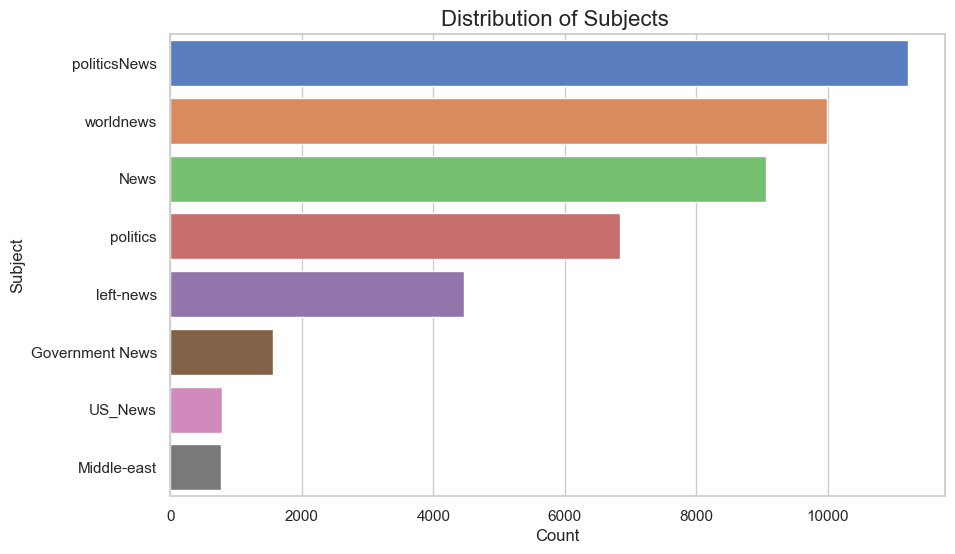

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index, palette="muted")
plt.title("Distribution of Subjects ", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

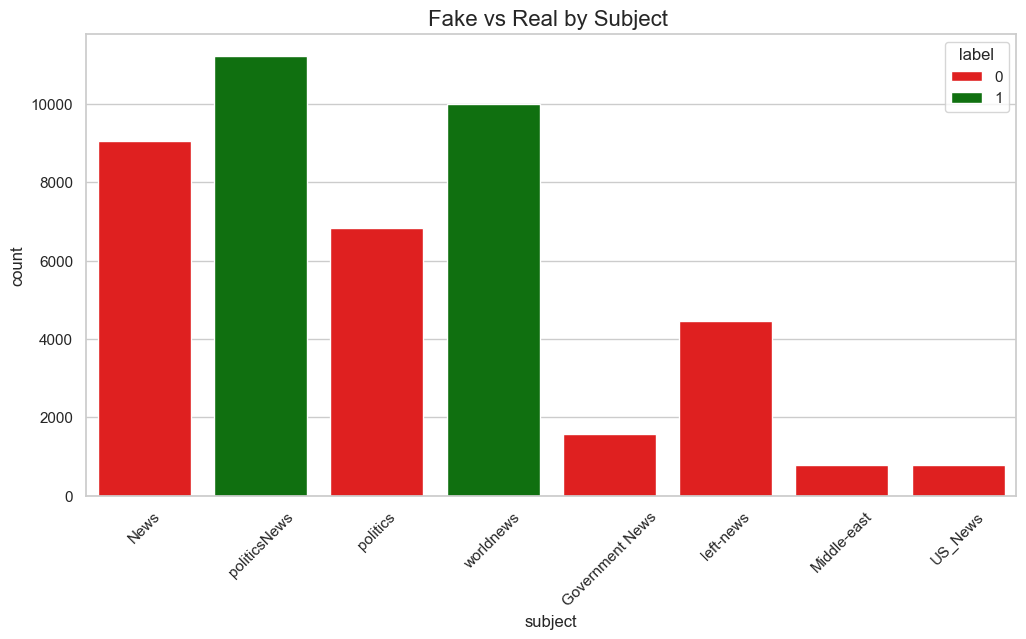

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='subject', hue='label', data=df, palette={0:'red', 1:'green'})
plt.title("Fake vs Real by Subject ", fontsize=16)
plt.xticks(rotation=45)
plt.show()

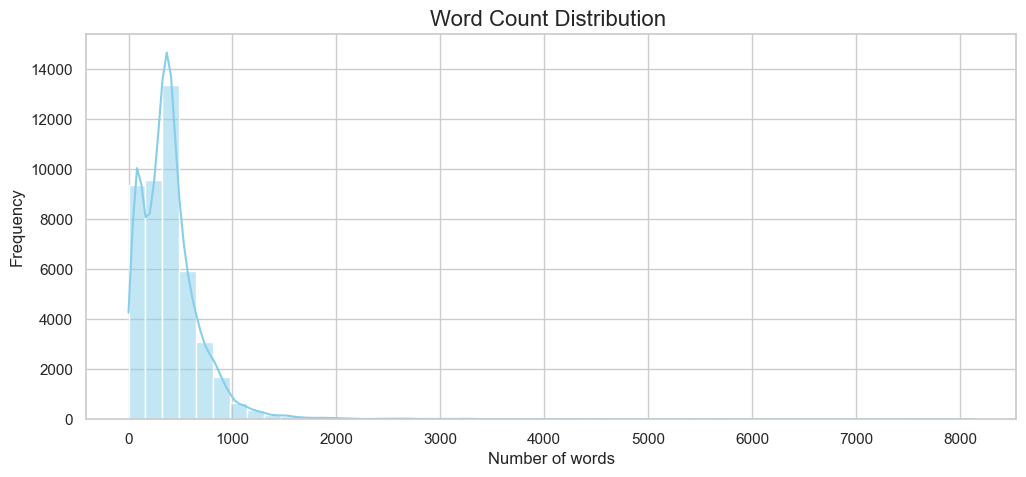

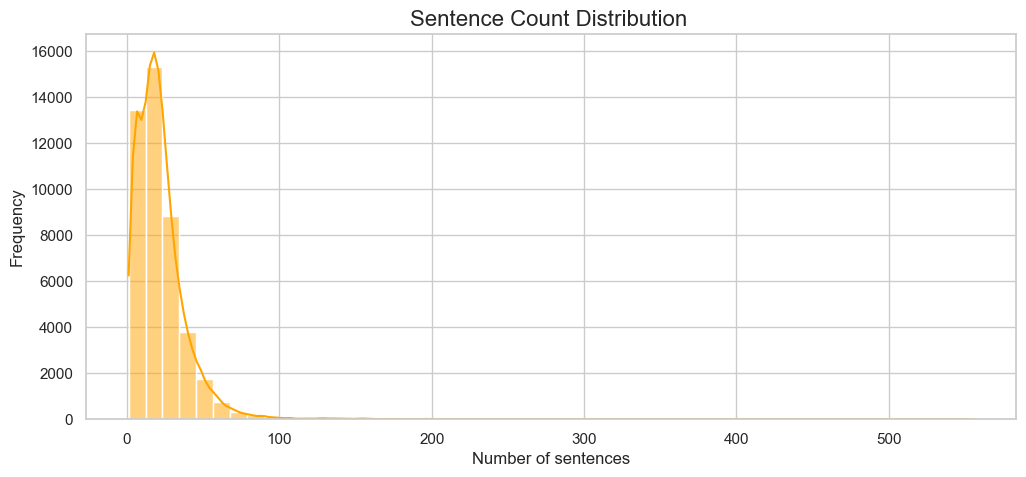

In [34]:
# Creating new columns for word and sentence counts
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['text'].apply(lambda x: len(str(x).split('.')))
# Word count distribution
plt.figure(figsize=(12,5))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title("Word Count Distribution ", fontsize=16)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()
# Sentence count distribution
plt.figure(figsize=(12,5))
sns.histplot(df['sentence_count'], bins=50, kde=True, color='orange')
plt.title("Sentence Count Distribution ", fontsize=16)
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()


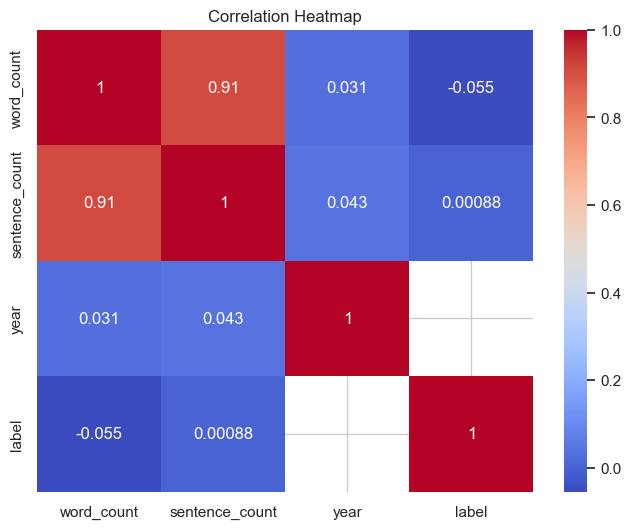

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['word_count','sentence_count','year','label']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\rames\AppData\Local\Temp\ipykernel_20692\1254879137.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(top_words), palette='viridis')


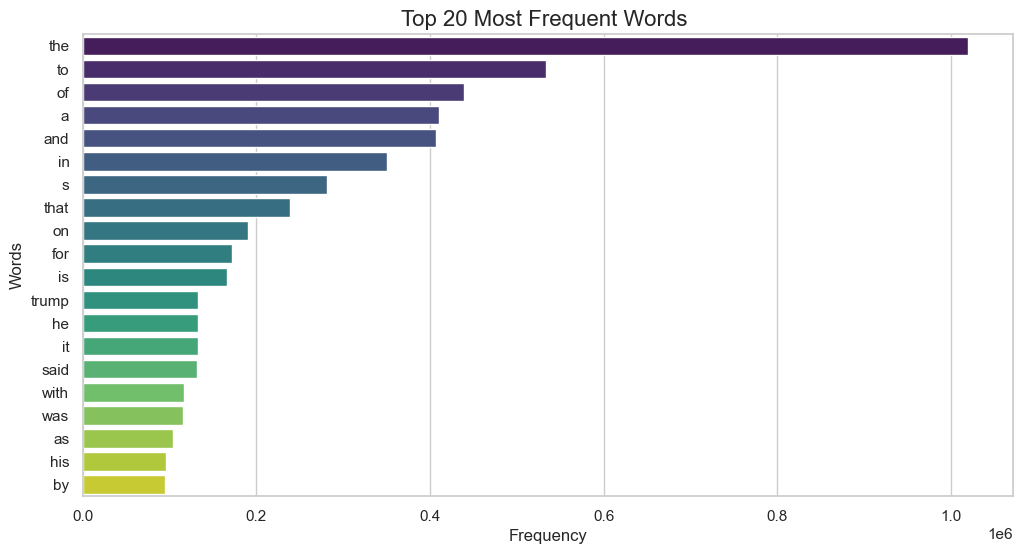

In [38]:
from collections import Counter
import re
# Combining all  the text
all_text = ' '.join(df['text'].astype(str))
# Simple tokenization (removing punctuation, lowercase)
words = re.findall(r'\b\w+\b', all_text.lower())
# Counting top 20 words
word_counts = Counter(words)
top_20 = word_counts.most_common(20)
# Displaying top 20
top_words, counts = zip(*top_20)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(top_words), palette='viridis')
plt.title("Top 20 Most Frequent Words ", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

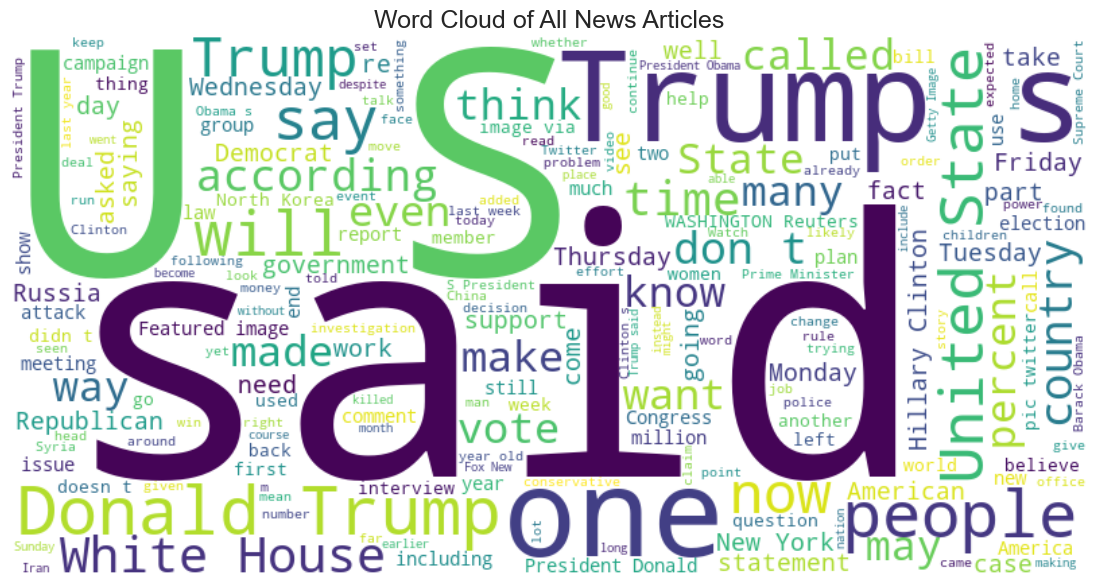

In [40]:
from wordcloud import WordCloud
# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All News Articles", fontsize=18)
plt.show()

### 3. DATA PREPROCESSING 

In [45]:
# Cleaning of text

import re
def clean_text(text):
    text = text.lower()
    # removing punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text
df['clean_text'] = df['text'].astype(str).apply(clean_text)
df[['text','clean_text']].head()

,text,clean_text
0,"Donald Trump s White House is in chaos, and th...",donald trump s white house is in chaos and the...
1,Now that Donald Trump is the presumptive GOP n...,now that donald trump is the presumptive gop n...
2,Mike Pence is a huge homophobe. He supports ex...,mike pence is a huge homophobe he supports exg...
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gen...
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning is all that comes from pelos...


In [51]:
# Removing stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average words before stopword removal: 404.966501823715
Average words after stopword removal: 228.5779050773121


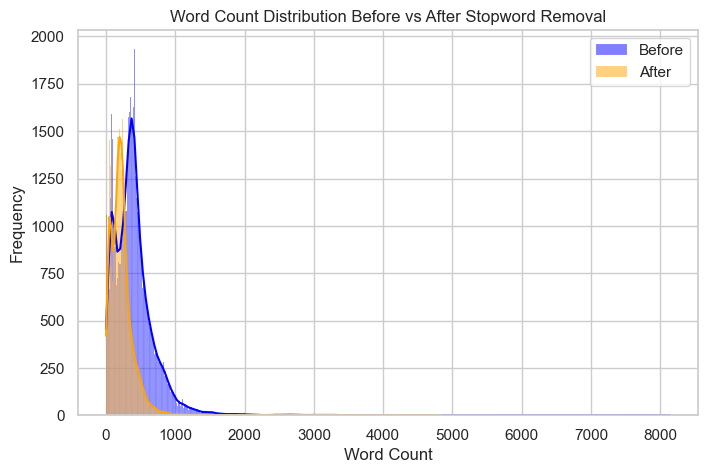

In [55]:
# Word counts before & after stopword removal
df['word_count_before'] = df['text'].apply(lambda x: len(str(x).split()))
df['word_count_after'] = df['clean_text'].apply(lambda x: len(str(x).split()))

# Average words before/after
print("Average words before stopword removal:", df['word_count_before'].mean())
print("Average words after stopword removal:", df['word_count_after'].mean())

# Plot the comparison
plt.figure(figsize=(8,5))
sns.histplot(df['word_count_before'], color='blue', label='Before', kde=True)
sns.histplot(df['word_count_after'], color='orange', label='After', kde=True)
plt.title("Word Count Distribution Before vs After Stopword Removal")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [61]:
# Tokenization 

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
df['tokens'] = df['clean_text'].apply(word_tokenize)
df[['clean_text','tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,clean_text,tokens
0,donald trump white house chaos trying cover ru...,"[donald, trump, white, house, chaos, trying, c..."
1,donald trump presumptive gop nominee time reme...,"[donald, trump, presumptive, gop, nominee, tim..."
2,mike pence huge homophobe supports exgay conve...,"[mike, pence, huge, homophobe, supports, exgay..."
3,san francisco reuters california attorney gene...,"[san, francisco, reuters, california, attorney..."
4,twisted reasoning comes pelosi days especially...,"[twisted, reasoning, comes, pelosi, days, espe..."


In [66]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]
df['lemmatized'] = df['tokens'].apply(lemmatize_tokens)
df[['tokens','lemmatized']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,lemmatized
0,"[donald, trump, white, house, chaos, trying, c...","[donald, trump, white, house, chaos, trying, c..."
1,"[donald, trump, presumptive, gop, nominee, tim...","[donald, trump, presumptive, gop, nominee, tim..."
2,"[mike, pence, huge, homophobe, supports, exgay...","[mike, penny, huge, homophobe, support, exgay,..."
3,"[san, francisco, reuters, california, attorney...","[san, francisco, reuters, california, attorney..."
4,"[twisted, reasoning, comes, pelosi, days, espe...","[twisted, reasoning, come, pelosi, day, especi..."


### FEATURE EXTRACTION

In [76]:
# FEATURE EXTRACTION (using  Bag of Words[BoW])
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(df['clean_text'])
print("BoW Shape:", X_bow.shape)
df.head()

BoW Shape: (44689, 5000)


,title,text,subject,date,label,year,word_count,sentence_count,clean_text,word_count_before,word_count_after,tokens,lemmatized,lemmatized_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,2017-07-21,0,2017.0,361,17,donald trump white house chaos trying cover ru...,361,180,"[donald, trump, white, house, chaos, trying, c...","[donald, trump, white, house, chaos, trying, c...",donald trump white house chaos trying cover ru...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,2016-05-07,0,2016.0,495,22,donald trump presumptive gop nominee time reme...,495,271,"[donald, trump, presumptive, gop, nominee, tim...","[donald, trump, presumptive, gop, nominee, tim...",donald trump presumptive gop nominee time reme...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,2016-12-03,0,2016.0,379,22,mike pence huge homophobe supports exgay conve...,379,215,"[mike, pence, huge, homophobe, supports, exgay...","[mike, penny, huge, homophobe, support, exgay,...",mike penny huge homophobe support exgay conver...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,NaT,1,NaN,88,4,san francisco reuters california attorney gene...,88,57,"[san, francisco, reuters, california, attorney...","[san, francisco, reuters, california, attorney...",san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,NaT,0,NaN,138,6,twisted reasoning comes pelosi days especially...,138,74,"[twisted, reasoning, comes, pelosi, days, espe...","[twisted, reasoning, come, pelosi, day, especi...",twisted reasoning come pelosi day especially p...


In [78]:
# FEATURE EXTRACTION (using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])
print("TF-IDF Shape:", X_tfidf.shape)
df.head()

TF-IDF Shape: (44689, 5000)


,title,text,subject,date,label,year,word_count,sentence_count,clean_text,word_count_before,word_count_after,tokens,lemmatized,lemmatized_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,2017-07-21,0,2017.0,361,17,donald trump white house chaos trying cover ru...,361,180,"[donald, trump, white, house, chaos, trying, c...","[donald, trump, white, house, chaos, trying, c...",donald trump white house chaos trying cover ru...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,2016-05-07,0,2016.0,495,22,donald trump presumptive gop nominee time reme...,495,271,"[donald, trump, presumptive, gop, nominee, tim...","[donald, trump, presumptive, gop, nominee, tim...",donald trump presumptive gop nominee time reme...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,2016-12-03,0,2016.0,379,22,mike pence huge homophobe supports exgay conve...,379,215,"[mike, pence, huge, homophobe, supports, exgay...","[mike, penny, huge, homophobe, support, exgay,...",mike penny huge homophobe support exgay conver...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,NaT,1,NaN,88,4,san francisco reuters california attorney gene...,88,57,"[san, francisco, reuters, california, attorney...","[san, francisco, reuters, california, attorney...",san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,NaT,0,NaN,138,6,twisted reasoning comes pelosi days especially...,138,74,"[twisted, reasoning, comes, pelosi, days, espe...","[twisted, reasoning, come, pelosi, day, especi...",twisted reasoning come pelosi day especially p...


In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Using lemmatized column,  to join tokens back into string
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

#  BoW Representation 
bow = CountVectorizer(max_features=20)
X_bow_demo = bow.fit_transform(df['lemmatized_text'])

# TF-IDF Representation 
tfidf = TfidfVectorizer(max_features=20)
X_tfidf_demo = tfidf.fit_transform(df['lemmatized_text'])
article_index = 0
print("Original text:\n", df.loc[article_index, 'text'])
print("\nTokens:\n", df.loc[article_index, 'tokens'])
print("\nLemmatized tokens:\n", df.loc[article_index, 'lemmatized'])
print("\n--- BoW ---")
print("Feature names (words):\n", bow.get_feature_names_out())
print("BoW vector (numeric representation):\n", X_bow_demo[article_index].toarray())
print("\n--- TF-IDF ---")
print("Feature names (words):\n", tfidf.get_feature_names_out())
print("TF-IDF vector (numeric representation):\n", X_tfidf_demo[article_index].toarray())

Original text:
 Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s  fake news,  or a  hoax.  However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump   most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what

**Why TF-IDF was chosen over Bag-of-Words(BoW)?**

While BoW simply counts word occurrences, TF-IDF gives more weight to **words that are important in a document but rare across all documents**.  
This helps the model focus on **distinctive words** that differentiate fake and real news, rather than common words that appear everywhere.  

Therefore we use TF-IDF as the main feature representation for model training.


### 4. MODEL BUILDING

In [83]:
from sklearn.model_selection import train_test_split
X = X_tfidf_demo  
y = df['label']    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y) 
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (35751, 20)
Test shape: (8938, 20)


#### 4.1 LOGISTIC REGRESSION

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4696
           1       0.99      0.97      0.98      4242

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



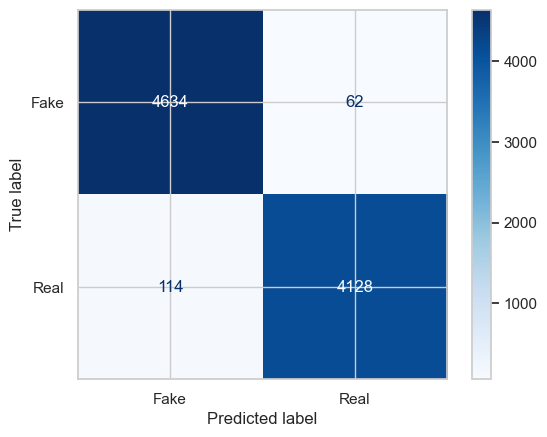

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm, display_labels=['Fake', 'Real']).plot(cmap='Blues')

#### 4.2 MULTINOMIAL NAIVE BAYES

Naive Bayes Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4696
           1       0.89      0.89      0.89      4242

    accuracy                           0.90      8938
   macro avg       0.90      0.90      0.90      8938
weighted avg       0.90      0.90      0.90      8938



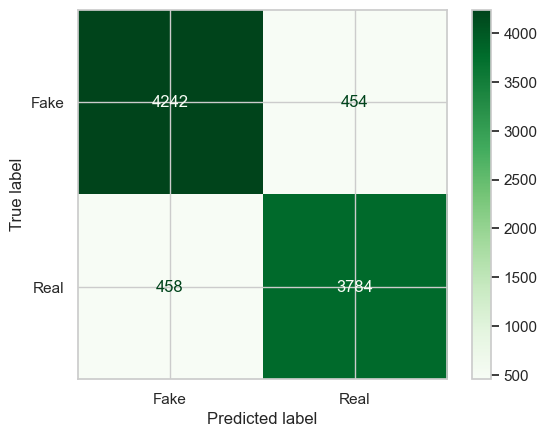

In [102]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Report:\n")
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm, display_labels=['Fake', 'Real']).plot(cmap='Greens')

#### 4.3 RANDOM FOREST

Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4696
           1       0.99      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



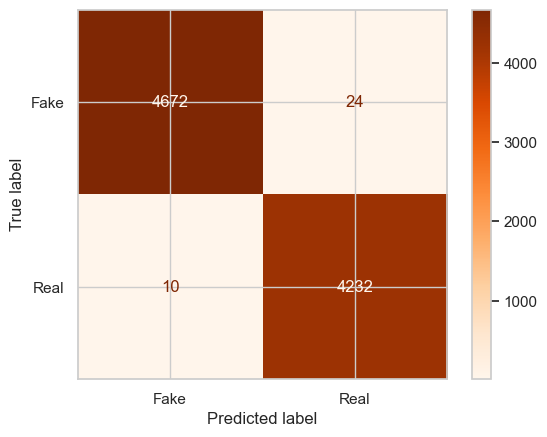

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=['Fake', 'Real']).plot(cmap='Oranges')

#### 4.4 XGBoost

C:\Users\rames\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:29:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       0.99      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



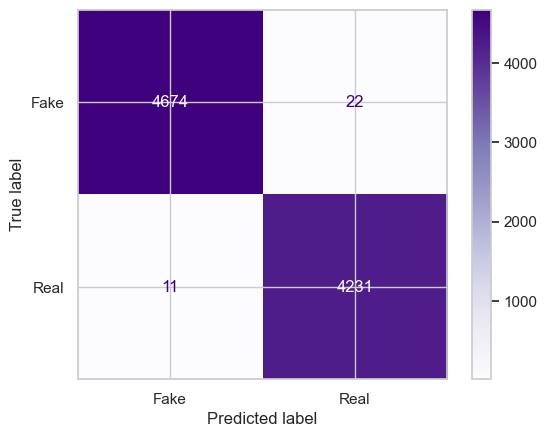

In [110]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm, display_labels=['Fake', 'Real']).plot(cmap='Purples')

#### 4.5 K-Nearest Neighbors

K-Nearest Neighbors Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4696
           1       0.90      0.93      0.91      4242

    accuracy                           0.92      8938
   macro avg       0.92      0.92      0.92      8938
weighted avg       0.92      0.92      0.92      8938



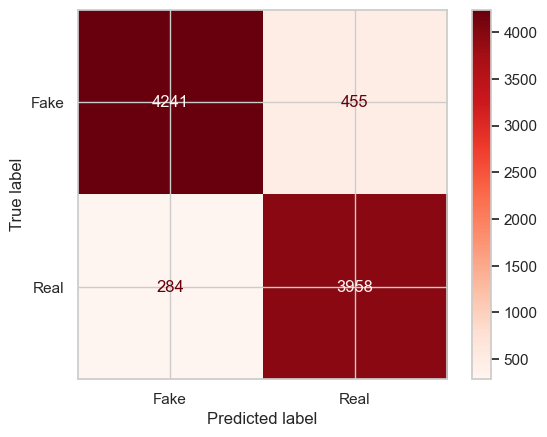

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Report:\n")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=['Fake', 'Real']).plot(cmap='Reds')

#### 4.6 Decision Tree Classifier

Decision Tree Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



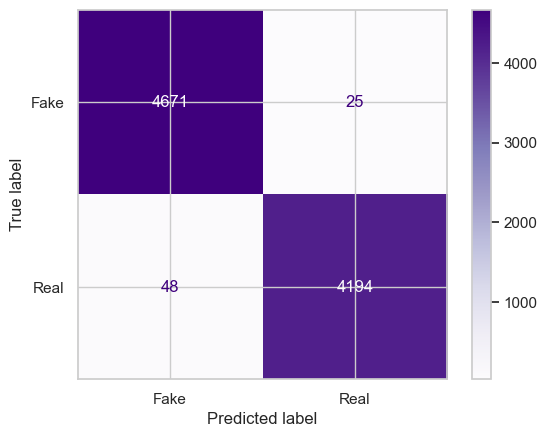

In [118]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Report:\n")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=['Fake', 'Real']).plot(cmap='Purples')

### COMPARISION OF MODELS

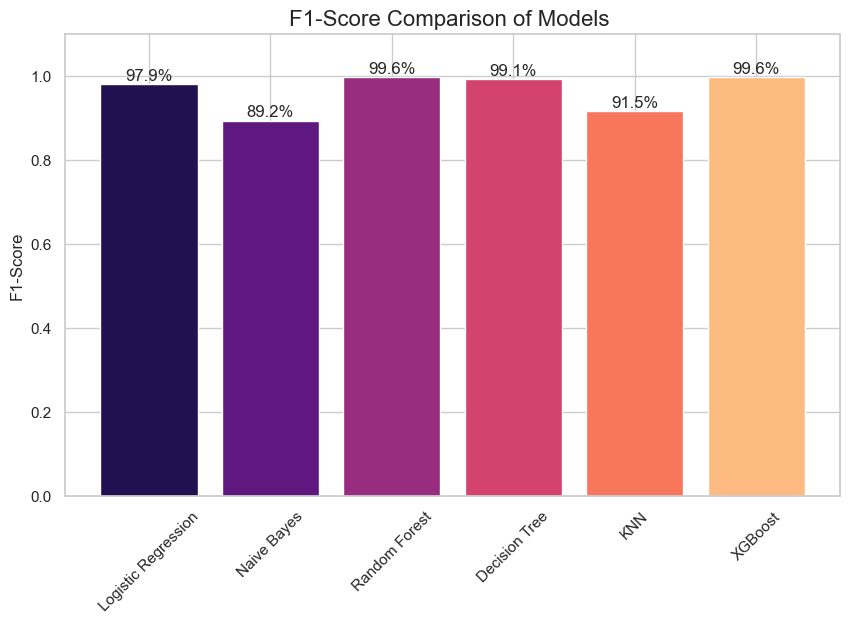

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
models['XGBoost'] = y_pred_xgb
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'F1-Score': [f1_score(y_test, y_pred, zero_division=0) for y_pred in models.values()],
    'Accuracy': [accuracy_score(y_test, y_pred) for y_pred in models.values()]
})
palette = sns.color_palette("magma", n_colors=len(models))
plt.figure(figsize=(10,6))
bars = plt.bar(results_df['Model'], results_df['F1-Score'], color=palette)
plt.ylim(0,1)
plt.ylim(0, 1.1)  
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison of Models ", fontsize=16)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height*100:.1f}%', ha='center', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Why some models performed better than others?**

**-** Tree-based models like **Random Forest** and **XGBoost** performed the best because they can handle **high-dimensional, sparse data** such as TF-IDF vectors and are able to capture complex patterns in the text.  

**-** Models like **Logistic Regression** and **Naive Bayes** also work well with text data, but they may struggle when the relationships in the data are more complicated.  

**-** On the other hand, **KNN** and **Decision Tree** didn’t perform as well because they have difficulty dealing with the sparsity and high dimensionality of TF-IDF features.  
So this is why **ensemble tree-based models** like XGBoost achieved the highest accuracy in the dataset.
